In [1]:
!pip install dlib

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import dlib

In [5]:
import os

In [6]:
from imutils import face_utils

In [7]:
from google.colab import drive

In [8]:
from google.colab.patches import cv2_imshow


In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path = '/content/drive/MyDrive/test_opencv'

In [16]:
os.listdir(path)

['res10_300x300_ssd_iter_140000_fp16.caffemodel',
 'deploy.prototxt.txt.prototxt',
 'models',
 'face.jpg',
 'face2.jpg']

In [23]:
img = cv2.imread(path+'/face.jpg')

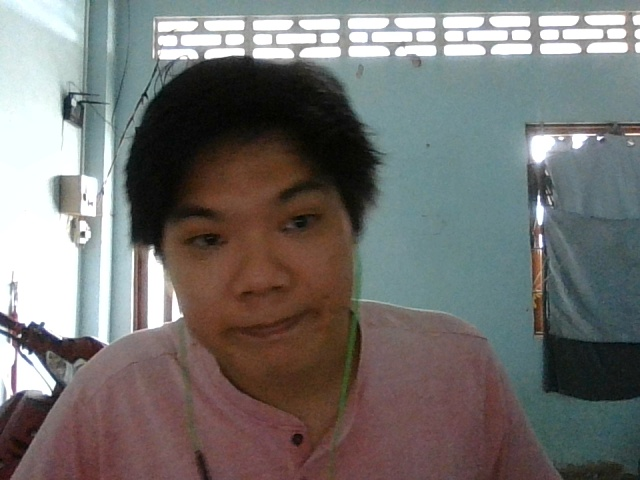

In [24]:
cv2_imshow(img)

In [34]:
import os

# Kiểm tra xem tệp deploy.prototxt có tồn tại không
prototxt_path = '/content/drive/MyDrive/test_opencv/models/deploy.prototxt'
caffemodel_path = '/content/drive/MyDrive/test_opencv/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'

print("Prototxt tồn tại:", os.path.exists(prototxt_path))
print("Caffemodel tồn tại:", os.path.exists(caffemodel_path))


Prototxt tồn tại: False
Caffemodel tồn tại: True


In [35]:
import os

# Đường dẫn đến tệp hiện tại
old_name = '/content/drive/MyDrive/test_opencv/models/deploy.prototxt.txt.prototxt'

# Đường dẫn mới sau khi đổi tên
new_name = '/content/drive/MyDrive/test_opencv/models/deploy.prototxt'

# Đổi tên tệp
os.rename(old_name, new_name)
print(f"Tệp đã được đổi tên thành: {new_name}")

Tệp đã được đổi tên thành: /content/drive/MyDrive/test_opencv/models/deploy.prototxt


In [36]:
net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/test_opencv/models/deploy.prototxt',
                               '/content/drive/MyDrive/test_opencv/models/res10_300x300_ssd_iter_140000_fp16.caffemodel')


(1, 1, 200, 7)
[0.         1.         0.99978393 0.25325125 0.2687055  0.5530038
 0.78179467]
[0.25325125 0.2687055  0.5530038  0.78179467]
162 128 353 375


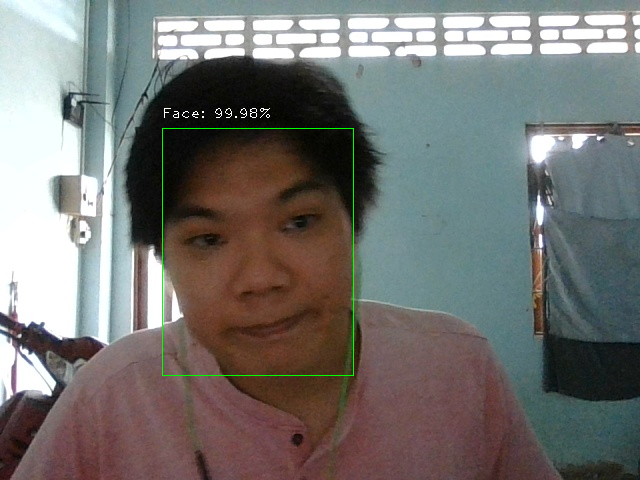

In [37]:
# Chuẩn bị dữ liệu đầu vào
# img: Đây là ảnh đầu vào mà bạn muốn nhận dạng khuôn mặt. Trong trường hợp của bạn, bạn đã đọc ảnh từ tệp "face.png".
# 1.0: Đây là tỷ lệ co giãn cho ảnh. Trong trường hợp này, ảnh sẽ không bị co giãn hoặc mở rộng, và giữ nguyên kích thước ban đầu.
# (300, 300): Đây là kích thước mà mô hình yêu cầu cho ảnh đầu vào. Mô hình mà bạn đang sử dụng mong muốn ảnh có kích thước 300x300 pixel. Do đó, bạn co giãn hoặc cắt ảnh đầu vào thành kích thước này.
# (104, 177, 123): Đây là giá trị trung bình màu sắc được trừ đi từ mỗi pixel của ảnh. Điều này thường được sử dụng để chuẩn hóa dữ liệu đầu vào. Trong trường hợp này, các giá trị này thường được lấy từ dữ liệu huấn luyện của mô hình.
# swapRB=False: Đây là một cờ để xác định xem có cần hoán đổi các kênh màu đỏ và xanh (Red-Blue) trong ảnh hay không. Trong trường hợp này, bạn đã đặt nó thành False, tức là không hoán đổi kênh mà
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104, 177, 123), swapRB=False)

# Đặt dữ liệu đầu vào cho mạng
net.setInput(blob)

# Chạy mạng để phát hiện khuôn mặt
faces = net.forward()

# Lấy kích thước của ảnh đầu vào
h = img.shape[0]
w = img.shape[1]

# In thông tin
print(faces.shape)
print(faces[0, 0, 0, ])

# Duyệt từng khuôn mặt đã được phát hiện
for i in range(0, faces.shape[2]):
    confidence = faces[0,0,i,2]
    # Kiểm tra nếu mặt có độ tin cậy là 0.5
    if confidence>0.5:
        # Trích xuất tọa độ
        print(faces[0, 0, i, 3:7])
        startx = int(faces[0, 0, i, 3]*w)
        starty = int(faces[0, 0, i, 4]*h)
        endx = int(faces[0, 0, i, 5]*w)
        endy = int(faces[0, 0, i, 6]*h)
        print(startx, starty, endx, endy)

        # Vẽ hình chữ nhật xung quanh khuôn mặt đã phát hiện
        cv2.rectangle(img, (startx, starty), (endx, endy), (0, 255, 0),)

        # Hiển thị độ tin cậy
        text = 'Face: {:.2f}%'.format(confidence*100);
        cv2.putText(img, text, (startx, starty-10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255),)

# Hiển thị ảnh gốc
cv2_imshow(img)

In [38]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib
from imutils import face_utils

# New Section